# Processus Aleatoire Markovien oscillant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class Markov_Random_Process:
    def __init__(self):
        n_base_states = 5
        self.markov_base = 0.99 * np.eye(n_base_states,n_base_states) + 0.01 * np.ones([n_base_states,n_base_states])
        self.base_state = np.random.randint(5)
        
        self.norm_freq_array = np.random.rand(n_base_states)-0.5
        self.amplitude_array = np.abs(np.random.randn(n_base_states))
        
        self.ar2_state = 0
        
        
    def get_next_state(self):
        
        alpha = 1e-3
        m = self.base_state
        proba = self.markov_base[:,m]/np.sum(self.markov_base[:,m])
        m = np.argmax(np.random.multinomial(1,proba))
        self.base_state = m
        
        self.ar2_state = ((1 - alpha)
                          * np.exp( complex(0, 2 * np.pi * self.norm_freq_array[m]))
                          * self.ar2_state 
                          + alpha 
                          * np.exp(complex(0,2*np.pi*np.random.rand())) 
                          * np.random.randn()
                          * self.amplitude_array[m])
        
        return self.ar2_state.real, m
    
    def get_next_sample(self):
        s,m = self.get_next_state()
        return s          
        

In [7]:
p = Markov_Random_Process()
L = []
for i in range(1000):
    L.append(p.get_next_sample())

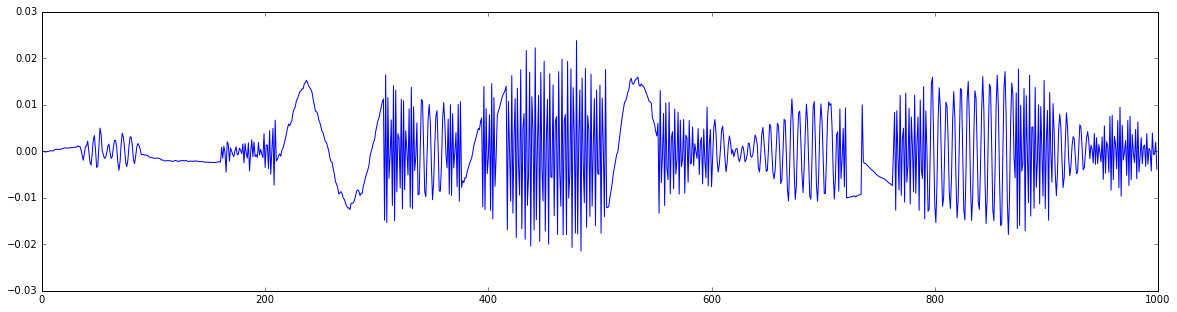

In [79]:
plt.figure(figsize=(20,5))
plt.plot(L)